In [1]:
from google.colab import files
uploaded = files.upload()

Saving movie_metadata.csv to movie_metadata.csv


In [2]:
import pandas as pd
table = pd.read_csv("movie_metadata.csv", sep = ",")
df_1 = pd.DataFrame(table)
df_1

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5038,Color,Scott Smith,1.0,87.0,2.0,318.0,Daphne Zuniga,637.0,NaN,Comedy|Drama,...,6.0,English,Canada,NaN,NaN,2013.0,470.0,7.7,NaN,84
5039,Color,NaN,43.0,43.0,NaN,319.0,Valorie Curry,841.0,NaN,Crime|Drama|Mystery|Thriller,...,359.0,English,USA,TV-14,NaN,NaN,593.0,7.5,16.00,32000
5040,Color,Benjamin Roberds,13.0,76.0,0.0,0.0,Maxwell Moody,0.0,NaN,Drama|Horror|Thriller,...,3.0,English,USA,NaN,1400.0,2013.0,0.0,6.3,NaN,16
5041,Color,Daniel Hsia,14.0,100.0,0.0,489.0,Daniel Henney,946.0,10443.0,Comedy|Drama|Romance,...,9.0,English,USA,PG-13,NaN,2012.0,719.0,6.3,2.35,660


In [3]:
df_2 = df_1.loc[ :,['director_name', 'budget', 'imdb_score', 'title_year']]
df_2

,director_name,budget,imdb_score,title_year
0,James Cameron,237000000.0,7.9,2009.0
1,Gore Verbinski,300000000.0,7.1,2007.0
2,Sam Mendes,245000000.0,6.8,2015.0
3,Christopher Nolan,250000000.0,8.5,2012.0
4,Doug Walker,NaN,7.1,NaN
...,...,...,...,...
5038,Scott Smith,NaN,7.7,2013.0
5039,NaN,NaN,7.5,NaN
5040,Benjamin Roberds,1400.0,6.3,2013.0
5041,Daniel Hsia,NaN,6.3,2012.0


In [4]:
df_3 = df_2.sort_values(by=['director_name', 'title_year', 'budget'])
df_3

,director_name,budget,imdb_score,title_year
4605,A. Raven Cruz,1000000.0,1.9,2005.0
4314,Aaron Hann,NaN,6.0,2015.0
3497,Aaron Schneider,7500000.0,7.1,2009.0
2182,Aaron Seltzer,20000000.0,2.7,2006.0
2909,Abel Ferrara,12500000.0,6.6,1996.0
...,...,...,...,...
4798,NaN,NaN,7.7,NaN
4803,NaN,NaN,8.2,NaN
4819,NaN,NaN,6.7,NaN
4869,NaN,NaN,8.5,NaN


In [5]:
df_4 = pd.DataFrame(df_3['director_name'].value_counts().sort_values())
df_4

,count
director_name,
Scott Frank,1
Emile Ardolino,1
Ellory Elkayem,1
Eli Craig,1
Eldar Rapaport,1
...,...
Ridley Scott,17
Martin Scorsese,20
Clint Eastwood,20


In [8]:
q1 = df_4.quantile(0.25)
q3 = df_4.quantile(0.75)

In [9]:
director_name = df_4[(df_4['count']>=q1['count'])&(df_4['count']<=q3['count'])].index
director_name_df = pd.DataFrame(director_name)
df_6 = df_3.merge(director_name_df)
df_6

,director_name,budget,imdb_score,title_year
0,A. Raven Cruz,1000000.0,1.9,2005.0
1,Aaron Hann,NaN,6.0,2015.0
2,Aaron Schneider,7500000.0,7.1,2009.0
3,Aaron Seltzer,20000000.0,2.7,2006.0
4,Abel Ferrara,12500000.0,6.6,1996.0
...,...,...,...,...
2235,Zoran Lisinac,250000.0,7.1,2013.0
2236,Álex de la Iglesia,10000000.0,6.1,2008.0
2237,Émile Gaudreault,5000000.0,6.7,2003.0
2238,Éric Tessier,3200000.0,6.6,2003.0


In [10]:
df_7 = pd.DataFrame(df_6['title_year'].value_counts().sort_values(ascending=False))
df_7

,count
title_year,
2014.0,144
2015.0,138
2013.0,129
2012.0,127
2009.0,125
...,...
1974.0,1
1976.0,1
1935.0,1


In [11]:
budget_norm = (df_3['budget']-df_3['budget'].mean())/df_3['budget'].std()
imdb_score_norm = (df_3['imdb_score']-df_3['imdb_score'].mean())/df_3['imdb_score'].std()
df_3['budget'] = budget_norm
df_3['imdb_score'] = imdb_score_norm
df_3

,director_name,budget,imdb_score,title_year
4605,A. Raven Cruz,-0.188015,-4.037040,2005.0
4314,Aaron Hann,NaN,-0.392971,2015.0
3497,Aaron Schneider,-0.156479,0.584706,2009.0
2182,Aaron Seltzer,-0.095833,-3.326002,2006.0
2909,Abel Ferrara,-0.132221,0.140308,1996.0
...,...,...,...,...
4798,NaN,NaN,1.117985,NaN
4803,NaN,NaN,1.562383,NaN
4819,NaN,NaN,0.229187,NaN
4869,NaN,NaN,1.829023,NaN


(array([3.82e+03, 4.78e+02, 1.73e+02, 5.30e+01, 1.40e+01, 0.00e+00,
        2.00e+00, 0.00e+00, 0.00e+00, 2.00e+00, 0.00e+00, 2.00e+00,
        0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 1.00e+00, 0.00e+00,
        1.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00,
        0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00,
        0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 1.00e+00, 0.00e+00,
        0.00e+00, 0.00e+00, 0.00e+00, 1.00e+00, 1.00e+00, 0.00e+00,
        0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00,
        0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00,
        0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00,
        0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00,
        0.00e+00, 0.00e+00, 1.00e+00, 0.00e+00, 0.00e+00, 0.00e+00,
        0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00,
        0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00,
        0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 

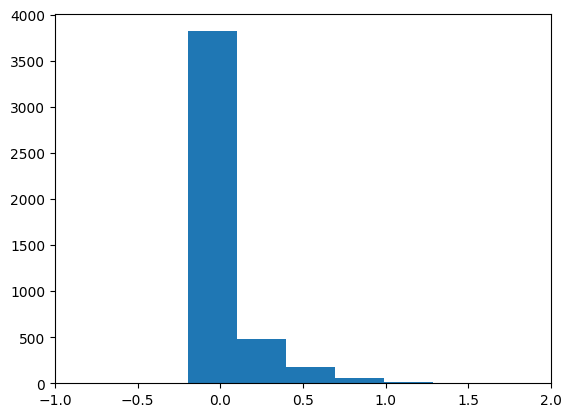

In [12]:
import matplotlib.pyplot as plt
plt.xlim(-1,2)
plt.hist(df_3['budget'].dropna(), bins=200)


(array([  16.,   38.,  102.,  222.,  579., 1158., 1515., 1085.,  307.,
          21.]),
 array([-4.30367908, -3.60152918, -2.89937927, -2.19722936, -1.49507946,
        -0.79292955, -0.09077964,  0.61137026,  1.31352017,  2.01567008,
         2.71781998]),
 <BarContainer object of 10 artists>)

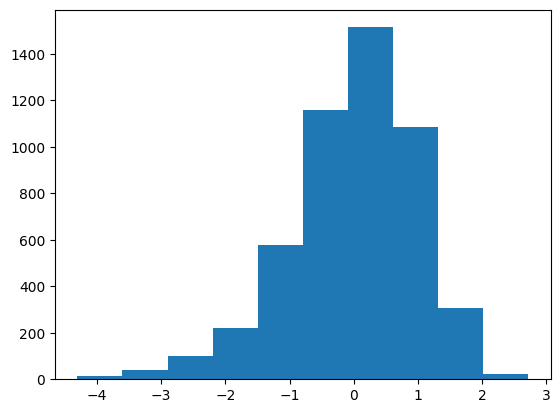

In [13]:
plt.hist(df_3['imdb_score'])


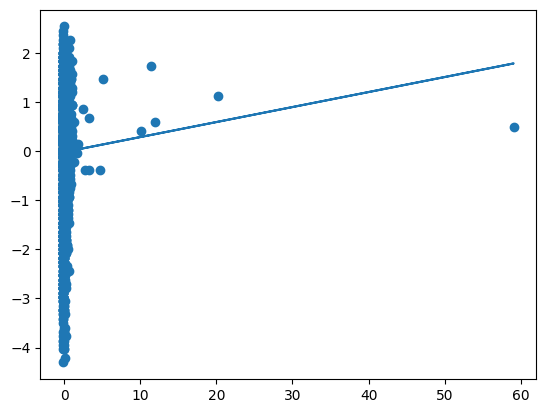

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
df_3_dropna = df_3.dropna()
model.fit(df_3_dropna[['budget']], df_3_dropna['imdb_score'])
y_pred = model.predict(df_3_dropna[['budget']])
plt.scatter(df_3_dropna['budget'], df_3_dropna['imdb_score'])
plt.plot(df_3_dropna['budget'], y_pred)